In [1]:
#IMPORT MODULES
import psycopg2
from sqlalchemy import create_engine
import sqlalchemy as sal
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#CREATE ENGINE PATH
engine = create_engine('postgres+psycopg2://@localhost:5432/SQL-challenge')
connection = engine.connect()
#CONNECT ENGINE
conn = engine.connect()

In [3]:
#FIND THE TABLE FROM THE DATABASE
employees = pd.read_sql("SELECT * FROM employees", conn)
employees.head() 

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


In [4]:
#CONNECT TO ENGINE PATH
conn = engine.connect()

In [5]:
#CHOOSE SALARY TABLE
salary = pd.read_sql("SELECT * FROM salaries", conn)
salary.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [6]:
#CONNECT TO ENGINE PATH
conn = engine.connect()

In [7]:
#CHOOSE TITLES TABLE
titles = pd.read_sql("SELECT * FROM titles", conn)
titles.head()

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


Text(0.5, 0, 'Salary($)')

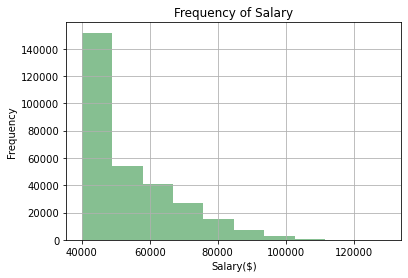

In [8]:
#MERGE TWO TABLES
employee_df = pd.merge(employees, salary, on = 'emp_no', how = 'left')

#CREATE A VARIABLE FOR SALARY
salary = employee_df['salary']

#Displaying and making a histogram
salary.hist(color='#86bf91')
plt.title('Frequency of Salary')
plt.ylabel('Frequency')
plt.xlabel('Salary($)')

In [9]:
#RENAME AND CLEAN COLUMNS
employee_df = employee_df.rename(columns={"emp_title_id": "title_id"})

#MERGE TO TITLES DF
employee_df = pd.merge(employee_df, titles, on = 'title_id', how = 'left')
employee_df.head()

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date,salary,title
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,40000,Staff
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07,53422,Engineer
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21,48973,Engineer
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,40000,Staff
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18,40000,Senior Engineer


In [10]:
#GROUPBY
group_title = employee_df.groupby('title_id')

#Finding the average salary
group_salary = group_title['salary'].mean()

#Converting into Data Frame
group_salary_df = pd.DataFrame(group_salary)

#Resetting Index
group_salary_df = group_salary_df.reset_index()

Text(0.5, 0, 'Title ID')

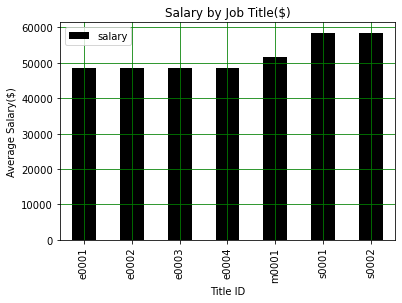

In [11]:
#Plotting a bar graph of average salary by job position
ax = group_salary_df.plot.bar(x = 'title_id', y = 'salary', rot = 90, color='k')
plt.grid(color='g')
plt.title('Salary by Job Title($)')
plt.ylabel('Average Salary($)')
plt.xlabel('Title ID')